## Automate: create, detect, write high_res blend 
started: Aug 18th 2020 <br>
edit: Oct 14 2020

/Users/shemmati/Dropbox/kinematic_lensing/disks/Blending/galblend2.py:150: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gals =torch.tensor(gals, device="cpu").float()
/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functio

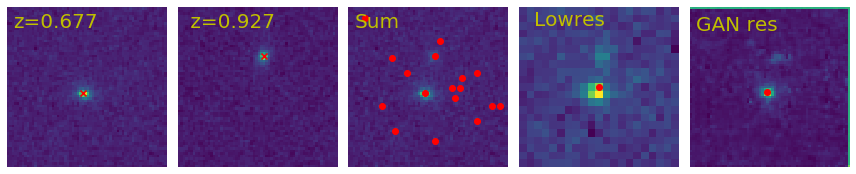

/Users/shemmati/Dropbox/kinematic_lensing/disks/Blending/galblend2.py:150: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gals =torch.tensor(gals, device="cpu").float()
/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2941: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functio

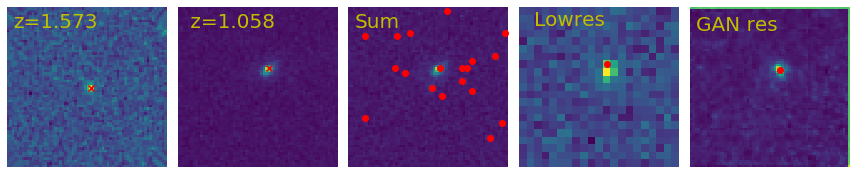

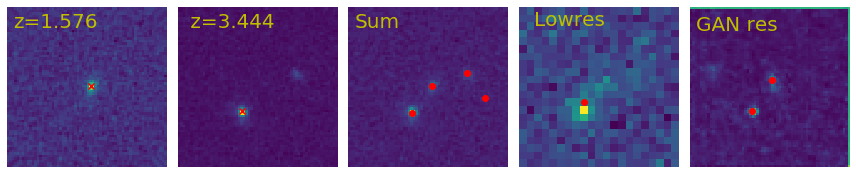

In [1]:
from galblend2 import *
%matplotlib inline 

hi,i1,i2,lo,gan,data = galblend2(gals=2,lim_hmag=24,plot_it=True)
hi,i1,i2,lo,gan,data = galblend2(gals=2,lim_hmag=24,plot_it=True)
hi,i1,i2,lo,gan,data = galblend2(gals=2,lim_hmag=24,plot_it=True)


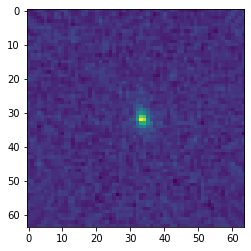

In [4]:
plt.imshow(i1)

In [ ]:
import astropy.io.fits as fits
f = open('Coordinates_gan.txt','w+')
k=0
for i in range(5000):
    hi,lo,gan,data = galblend2(gals=2,lim_hmag=24,plot_it=False)
    x,y=str2coord(str(data[5][2]))
    xlo,ylo=str2coord(str(data[5][1]))
    if (len(x)==2) and (len(xlo)==1):
        fits.writeto('images/low_res_'+str(k)+'.fits',lo,overwrite=True)
        f.write(str(k)+'\t'+str(x[0])+'\t'+str(x[1])+'\t'+str(y[0])+'\t'+str(y[1])+'\t'+str(data[3][0])+'\t'+str(data[3][1])+'\t'+str(xlo[0])+'\t'+str(ylo[0])+'\n')
        k+=1
f.close()

In [ ]:
%run photom.py

In [ ]:
f = open('photometry_lowres.txt','w+')
for i in range(len(flux_ref_lores)):
    f.write(str(flux_lores[i])+'\t'+str(flux_ref_lores[i])+'\n')
f.close()

In [ ]:
a,galax,g,data = galblend2(gals=2,lim_hmag=25,plot_it=True)

x_low,y_low = str2coord(str(data[5][1]))
x_gan,y_gan = str2coord(str(data[5][2]))
x_hi,y_hi = str2coord(str(data[5][0]))
x,y = [data[0][0],data[0][1]],[data[1][0],data[1][1]]
numgan = MatchGan(x,y,x_gan,y_gan)
numhi = MatchGan(x,y,x_hi,y_hi)
numlow = MatchLow(x,y,x_low,y_low)
dis = 0.06*distance (data[0][0],data[0][1],data[1][0],data[1][1])
mag = magdis(data[3][0],data[3][1])
dz = np.abs(data[2][0]-data[2][1])
s = max(data[4][0],data[4][1])
print([dis,mag,dz,s,numhi,numlow,numgan])     



In [ ]:
f = open('blend_data_new.txt','w+')
for i in range(5000):
    a,galax,g,data = galblend2(gals=2,lim_hmag=24,plot_it=False)
    f.write(str(data[0][0])+'\t'+str(data[0][1])+'\t'+str(data[1][0])+'\t'+str(data[1][1])+'\t'+str(data[2][0])
            +'\t'+str(data[2][1])+'\t'+str(data[3][0])+'\t'+str(data[3][1])
            +'\t'+str(data[4][0])+'\t'+str(data[4][1])+'\t'+str(data[5][0])+'\t'+str(data[5][1])
            +'\t'+str(data[5][2])+'\n')
f.close()

In [ ]:
import pandas as pd
data = pd.read_csv('blend_data_new.txt', sep="\t", header=None)
data.columns = ["x1","x2", "y1","y2", "z1","z2", "flux1","flux2","s1","s2","coord_hi","coord_low","coord_gan"]

data2=[]
for boz in range(len(data['x1'])):
    x_low,y_low = str2coord(data['coord_low'][boz])
    x_gan,y_gan = str2coord(data['coord_gan'][boz])
    x_hi,y_hi = str2coord(data['coord_hi'][boz])
    x,y = [data['x1'][boz],data['x2'][boz]],[data['y1'][boz],data['y2'][boz]]
    numgan = MatchGan(x,y,x_gan,y_gan)
    numhi = MatchGan(x,y,x_hi,y_hi)
    numlow = MatchLow(x,y,x_low,y_low)
    dis = 0.06*distance (data['x1'][boz],data['x2'][boz],data['y1'][boz],data['y2'][boz])
    mag = magdis(data['flux1'][boz],data['flux2'][boz])
    dz = np.abs(data['z1'][boz]-data['z2'][boz])
    if (0<data['flux1'][boz]<100)&(0<data['flux2'][boz]<100):
        data2.append([dis,data['flux1'][boz],data['flux2'][boz],data['z1'][boz],data['z2'][boz],data['s1'][boz],data['s2'][boz],numhi,numlow,numgan])                                 

df = pd.DataFrame(data2)
df.columns = ["distance", "flux1", "flux2", "z1", "z2", "s1", "s2","numhi" ,"numlow","numgan"]


In [ ]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
bins = np.linspace(0, 1.3, 10)
digitized = np.digitize(df['distance'], bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum(df[digitized == i]['numlow']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum(df[digitized == i]['numgan']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
plt.xlabel(r'$distance (arcsec)$',fontsize=15)
plt.ylabel(r'$ Deblending\ Fraction$',fontsize=15)
plt.ylim([0,1])

plt.subplot(2,3,2)
bins = np.linspace(1, 25, 15)
fmax = np.maximum(np.array(df['flux1']),np.array(df['flux2']))
fmin = np.minimum(np.array(df['flux1']),np.array(df['flux2']))
flux_ratio=fmax/fmin
digitized = np.digitize(flux_ratio, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum((df[digitized == i]['numlow']==2)/np.sum(df[digitized==i]['numlow']<=2)) for i in range(1, len(bins))]
bin_means_gan = [np.sum((df[digitized == i]['numgan']==2)/np.sum(df[digitized==i]['numlow']<=2)) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
plt.xlabel(r'$Flux\  Ratio$',fontsize=15)
#plt.legend(loc=1,fontsize=20)
plt.ylim([0,1])

plt.subplot(2,3,3)
bins = np.linspace(0., 3, 15)
dz = np.abs(df['z1']-df['z2'])
digitized = np.digitize(dz, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum(df[digitized == i]['numlow']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum(df[digitized == i]['numgan']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
#plt.legend(fontsize=15,loc=4)
plt.ylim([0,1])
plt.xlabel(r'$|z_{2}-z_{1}|$',fontsize=15)

plt.subplot(2,3,4)
bins = np.linspace(5, 50, 15)
sumsize = (df['s1']+df['s2'])
digitized = np.digitize(sumsize, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum(df[digitized == i]['numlow']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum(df[digitized == i]['numgan']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
#plt.legend(fontsize=15,loc=4)
plt.xlabel(r'$FWHM_{1}+FWHM_{2}$',fontsize=15)
plt.ylabel(r'$ Deblending\ Fraction$',fontsize=15)
plt.ylim([0,1])

plt.subplot(2,3,5)
bins = np.linspace(1, 5, 15)
smax = np.maximum(np.array(df['s1']),np.array(df['s2']))
smin = np.minimum(np.array(df['s1']),np.array(df['s2']))
ds=smax/smin
digitized = np.digitize(ds, bins)
bin_means_hi = [np.sum(df[digitized == i]['numhi']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
bin_means_low = [np.sum(df[digitized == i]['numlow']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
bin_means_gan = [np.sum(df[digitized == i]['numgan']==2)/np.sum(df[digitized==i]['numlow']<=2) for i in range(1, len(bins))]
x = bins[1:]-bins[1]/2
plt.fill_between(x,0,bin_means_hi,label='Highres',color='#F0CA50')
plt.fill_between(x,0,bin_means_gan,label='GANres',color='#C1395E')
plt.fill_between(x,0,bin_means_low,label='Lowres',color='#89A7C2')
#plt.legend(fontsize=15,loc=4)
plt.ylim([0,1])
plt.xlabel(r'$FWHM_{1}/FWHM_{2}$',fontsize=15)
plt.tight_layout()

plt.savefig('../plots/deblend_gan.png')


In [ ]:
import sompy

sel = flux_ratio<30

dat=np.array([df['distance'][sel],flux_ratio[sel],sumsize[sel],dz[sel]])
#dat=np.array([df['distance'][sel],df['flux1'][sel],df['flux2'][sel],df['s1'][sel],df['s2'][sel],df['z1'][sel],df['z2'][sel]])

data=dat.T
## Training a SOM with PCA initalization
msz0 = 32
msz1 = 24
sm = sompy.SOMFactory.build(data, mapsize=[msz0,msz1], mapshape='planar', lattice='rect', initialization='pca') 
sm.train(n_job=4, shared_memory = 'no')

In [ ]:
somcol=np.zeros(4,object)
plt.figure(figsize=(20,5))
colors=[r'$\rm distance$','Flux_ratio',r'$\rm \Sigma FWHM$',r'$\rm |z_{2}-z_{1}|$']

codebook = sm._normalizer.denormalize_by(sm.data_raw,sm.codebook.matrix)    
for ind in range(0,4):
    mp = codebook[:, ind].reshape(sm.codebook.mapsize[0],sm.codebook.mapsize[1])
    plt.subplot(1,4,ind+1)
    ax = plt.gca()
    im=ax.imshow(mp,origin='lower')
    somcol[ind]=np.ndarray.flatten(mp)
    #ax.axis('off')
    plt.title(str(colors[ind]),size=18)
    plt.colorbar(im)


plt.tight_layout()
plt.savefig('../plots/SOM_input.png')

In [ ]:
a=sm.bmu_ind_to_xy(sm.project_data(data))
x,y=np.zeros(len(a)),np.zeros(len(a))
k=0
for i in a:
    x[k]=i[0]
    y[k]=i[1]
    k+=1
    
med_l=np.zeros([msz0,msz1])
med_g=np.zeros([msz0,msz1])
med_h=np.zeros([msz0,msz1])

low = df['numlow'][sel]
gan = df['numgan'][sel]
hi = df['numhi'][sel]
for i in range(msz0):
    for j in range(msz1):
        unja=(x==i)&(y==j)
        med_l[i,j]=(np.median(low[unja]))
        med_g[i,j]=(np.median(gan[unja]))
        med_h[i,j]=(np.median(hi[unja]))
        

plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
plt.imshow(med_h,vmin=0,vmax=2,origin='lower',cmap='coolwarm')
plt.title('High resolution')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('low resolution')
plt.imshow(med_l,vmin=0,vmax=2,origin='lower',cmap='coolwarm')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('GAN resolution')
plt.imshow(med_g,vmin=0,vmax=2,origin='lower',cmap='coolwarm')
plt.axis('off')
plt.tight_layout()

#plt.savefig('../plots/SOM_blending.png')